<a href="https://colab.research.google.com/github/NandhanaRameshkumar/KMeans/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('Politics.csv')

In [ ]:
print(data)

    votes,expenses,party
0   100000,50000,Party A
1    80000,40000,Party B
2   120000,60000,Party A
3    90000,45000,Party B
4   110000,55000,Party A
5    95000,48000,Party B
6   130000,65000,Party A
7    85000,42000,Party B
8   125000,62000,Party A
9    87000,43500,Party B
10  105000,52000,Party A
11   82000,41000,Party B
12  115000,57000,Party A
13   88000,44000,Party B
14  135000,67000,Party A
15   87000,43500,Party B
16  123000,61000,Party A
17   86000,43000,Party B
18  118000,59000,Party A
19   89000,44500,Party B


In [ ]:
data = pd.DataFrame({'votes': [1, 2, 3, 4, 5], 'expenses': [100, 200, 300, 400, 500]})

In [ ]:
print(data.head())

   votes  expenses
0      1       100
1      2       200
2      3       300
3      4       400
4      5       500


In [ ]:
features = ['votes', 'expenses']

In [ ]:
# Preprocess the data (scaling and handling missing values)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

In [ ]:
print(scaled_data.shape)

(5, 2)


In [ ]:
inertia = []
for k in range(2, 5):  # Adjust the upper limit to be less than the number of samples (5)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(type(range(1, 11)))
print(range(1, 11))
print(inertia)

<class 'range'>
range(1, 11)
[2.499999999999999, 0.9999999999999998, 0.4999999999999999]


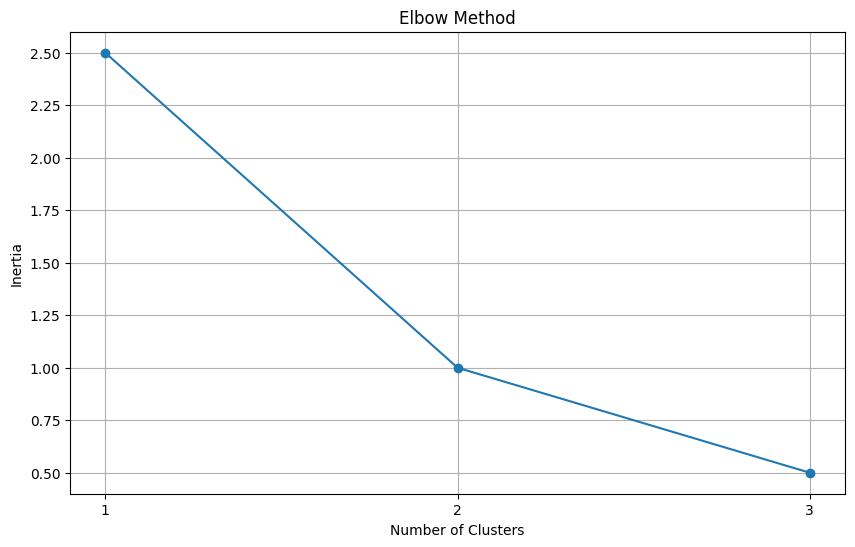

In [ ]:
# Plot the Elbow Method to visualize the optimal number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(inertia) + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(1, len(inertia) + 1))
plt.grid(True)
plt.show()

In [ ]:
# Based on the Elbow Method, let's assume 2 clusters for this example
n_clusters = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add the cluster labels to the original data
data['cluster'] = clusters

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Visualize the clusters using PCA for dimensionality reduction and scatter plot
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

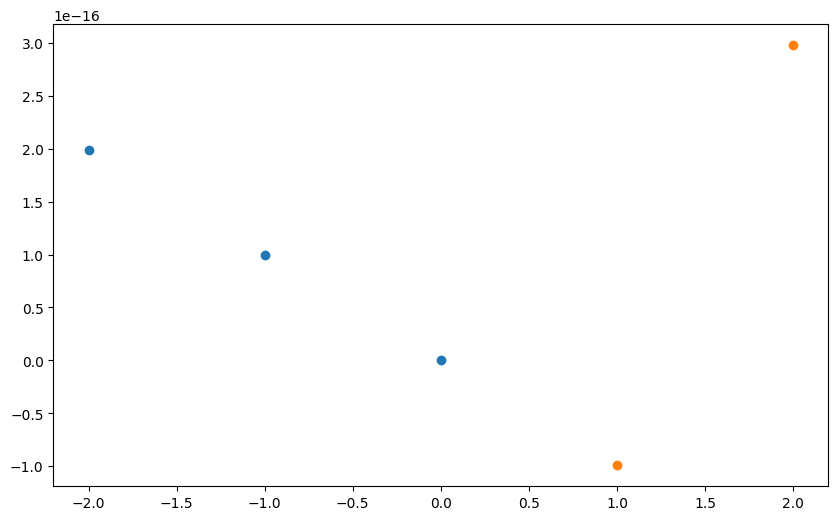

In [ ]:
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    plt.scatter(pca_data[clusters == cluster_label, 0], pca_data[clusters == cluster_label, 1], label=f'Cluster {cluster_label}')


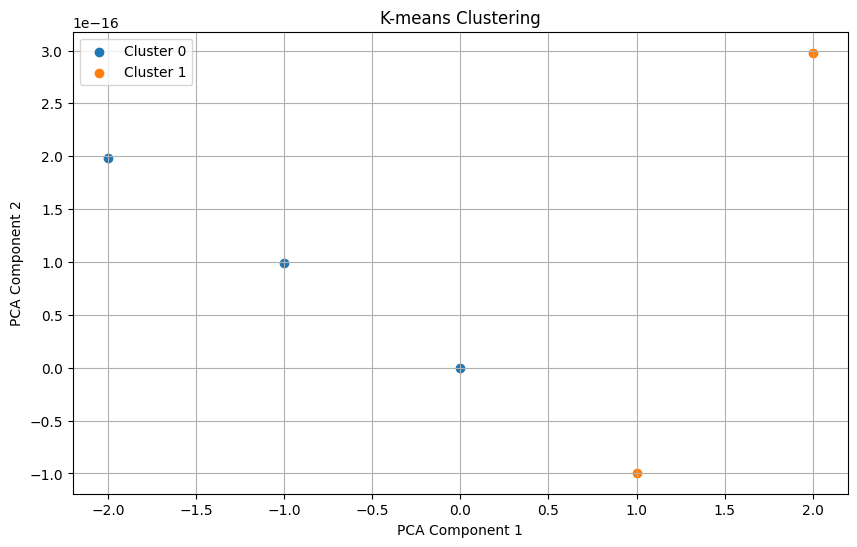

In [ ]:
# Visualize the clusters using PCA for dimensionality reduction and scatter plot
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    plt.scatter(pca_data[clusters == cluster_label, 0], pca_data[clusters == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Analyze the clusters (for demonstration purposes)
cluster_analysis = data.groupby('cluster')[features].mean()
print(cluster_analysis)

         votes  expenses
cluster                 
0          4.0     400.0
1          1.5     150.0
